Problem 1 - (a)

Recurrence concept은 과거의 기억을 지속하면서 새로운 정보를 받아들임과 동시에 과거의 정보과 새로운 정보에 대한 새로운 관계까지 추론해 내는 관계를 말한다. 즉, 이전 시간의 출력과 현재 시간의 입력을 함께 사용하여 다음 출력을 계산하는 구조이다. 이런 원리를 그대로 구현한 model이 RNN이다.

Problem 1 -(b)

Hidden layer: hₜ = tanh(Wₓxₜ + Wₕhₜ₋₁ + b)

- xₜ : 현재 시간의 입력
- hₜ₋₁ : 이전 시간의 출력
- hₜ : 현재 시간의 출력
- Wₓ, Wₕ : 입력 xₜ와 출력 hₜ₋₁을 위한 가중치
- b : 편향(bias)

즉, 입력값으로 들어온 xₜ와 이전 시점에서 계산된 hₜ₋₁을 이용하여 현재 시점 t의 hₜ가 계산된다.

Problem 1 - (c)

SimpleRNN 모델은 매우 단순해 실생활에 적용시키는데 있어 좋은 성능을 보이지 못한다. 또한 시간이 길어질수록 과거의 정보가 희석되어 단기기억상실 문제가 발생한다. LSTM은 은닉층의 메모리 셀에 입력 게이트, 삭제 게이트, 출력 게이트를 추가하여 불필요한 정보를 지우고 장기 상태에 저장할 정보를 저장한다. 즉, 장기 기억을 저장하기 위해 셀 상태(cell state)를 추가하여 정보를 장기간 보존하고, 게이트를 통해 필요한 정보만 선택적으로 전달하게 함으로써 gradient vanishing 문제를 보완한다.

Problem 1 -(d)

- 입력 게이트는 현재의 정보를 기억하는 게이트이다. 현재 시점 t의 입력 xₜ와 이전 hidden state hₜ₋₁, 가중치 Wₓ, Wₕ 를 바탕으로, 어떤 정보가 장기 상태에 더해져야 하는지, 즉 어떤 정보를 셀 상태에 저장할지 결정한다.
- 삭제 게이트는 장기 상태의 어느 부분이 삭제되어야 하는지 제어한다.
- 출력 게이트는 장기 상태의 어느 부분을 읽어서 출력(hidden state)으로 보낼지 제어한다.

Problem 1 -(e)

LSTM은 입력, 삭제, 출력 게이트를 가지지만, GRU는 업데이트 게이트와 리셋 게이트 두 개만을 사용한다. 또한, LSTM은 cell state와 hidden state를 분리해서 관리하지만 GRU는 hidden state만이 존재한다.

In [2]:
# Problem 2 - (a)

import os

imdb_dir = '/Users/82104/Downloads/aclImdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

print("총 리뷰 개수:", len(texts))
print("총 라벨 개수:", len(labels))

총 리뷰 개수: 25000
총 라벨 개수: 25000


In [3]:
# Problem 2 - (b)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100      # 문장의 최대 길이
max_words = 10000 # 사용할 최대 단어 수

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)            # 텍스트를 단어 인덱스로 변환 준비
sequences = tokenizer.texts_to_sequences(texts)  # 텍스트 -> 시퀀스

word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

data = pad_sequences(sequences, maxlen=maxlen)   # 시퀀스 길이 맞추기 (padding)

Found 88582 unique tokens.


In [4]:
# Problem 2 - (c)

import numpy as np

training_samples = 20000
validation_samples = 5000

# numpy 배열로 변환
labels = np.asarray(labels)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

# 25000개 중 앞의 20000개를 훈련, 뒤 5000개를 검증용
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print(f'train data: {len(x_train)}')
print(f'validation data: {len(x_val)}')

train data: 20000
validation data: 5000


In [5]:
# Problem 2 - (d)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.initializers import HeNormal

# model 1
# 은닉층 수: 1(Dense 32)
# 뉴런 수: 32
# 활성화 함수: relu(은닉층), sigmoid(출력층)
# 배치사이즈 32, 에포크 10
model1 = Sequential()
model1.add(Embedding(max_words, 100))
model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist1 = model1.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val), verbose = 0)


# model 2
# 은닉층 수: 2(Dense 64, 32)
# 뉴런 수: 64 -> 32
# 활성화 함수: tanh(은닉층), sigmoid(출력층)
# 배치사이즈 32, 에포크 10
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(Flatten())
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist2 = model2.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val), verbose = 0)

# model 3
# 은닉층 수: 1(Dense 32)
# 뉴런 수: 32
# 가중치 초기화 변경
# 활성화 함수: relu(은닉층), sigmoid(출력층)
# 배치사이즈 32, 에포크 10
model3 = Sequential()
model3.add(Embedding(max_words, 100))
model3.add(Flatten())
model3.add(Dense(32, activation='relu', kernel_initializer=HeNormal()))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist3 = model3.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_val, y_val), verbose = 0)

# model 4
# 은닉층 수: 3(Dense 64, 32, 16)
# 뉴런 수: 64 -> 32 -> 16
# 활성화 함수: relu(은닉층), sigmoid(출력층)
# 배치사이즈 64, 에포크 10
model4 = Sequential()
model4.add(Embedding(max_words, 100))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist4 = model4.fit(x_train, y_train, batch_size = 64, epochs = 10, validation_data = (x_val, y_val), verbose = 0)

# model 5
# 은닉층 수: 1(Dense 8)
# 뉴런 수: 8
# 활성화 함수: sigmoid
# 배치사이즈 16, 에포크 5
model5 = Sequential()
model5.add(Embedding(max_words, 100))
model5.add(Flatten())
model5.add(Dense(8, activation='sigmoid'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist5 = model5.fit(x_train, y_train, batch_size = 16, epochs = 5, validation_data = (x_val, y_val), verbose = 0)

In [9]:
# Problem 2 - (e)

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# threshold 탐색용 float range 함수
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

# 모델 평가 함수 (오분류율 최소화 기준)
def evaluate_confusion_matrix(model, model_name):
    print(f"\n {model_name}")
    
    # 확률 예측
    prob = model.predict(x_val)
    n = len(x_val)
    res = {}
    mylist = []

    # threshold를 0.4~0.8 사이에서 탐색
    for i in range_with_floats(0.4, 0.801, 0.001):
        for j in range(n):
            mylist.append(1 if prob[j] >= i else 0)
        mymtx = confusion_matrix(y_val, mylist)
        missrate = (mymtx[0,1] + mymtx[1,0]) / (sum(sum(mymtx)))
        res[round(i, 3)] = round(missrate, 4)
        mylist = []

    # 최적 threshold 선택
    best_threshold = min(res, key=res.get)
    min_missrate = res[best_threshold]

    # 선택된 threshold로 confusion matrix 다시 생성
    for j in range(n):
        mylist.append(1 if prob[j] >= best_threshold else 0)
    mymtx = confusion_matrix(y_val, mylist)

    # 표 형식 출력
    label = ["0(negative)", "1(positive)"]
    table = pd.DataFrame(mymtx, columns=label, index=label)
    print(f"Best threshold: {best_threshold}, Miss rate: {min_missrate}")
    print("Confusion Matrix:")
    print(table)

    return min_missrate, table

# 모든 모델 평가 및 결과 저장
results = []
models = [model1, model2, model3, model4, model5]

for i, m in enumerate(models, start=1):
    missrate, cmat = evaluate_confusion_matrix(m, f"Model {i}")
    results.append((f"Model {i}", missrate, cmat))


 Model 1
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best threshold: 0.573, Miss rate: 0.1736
Confusion Matrix:
             0(negative)  1(positive)
0(negative)         2080          419
1(positive)          449         2052

 Model 2
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Best threshold: 0.689, Miss rate: 0.1914
Confusion Matrix:
             0(negative)  1(positive)
0(negative)         2070          429
1(positive)          528         1973

 Model 3
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best threshold: 0.529, Miss rate: 0.177
Confusion Matrix:
             0(negative)  1(positive)
0(negative)         2065          434
1(positive)          451         2050

 Model 4
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best threshold: 0.4, Miss rate: 0.1834
Confusion Matrix:
             0(negative)  1(positive)
0(negative)         2058          441
1(positive)          476         2025

 Model 5
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best threshold: 0.42, Miss rate: 0.1672
Confusion Matrix

가장 성능이 좋은 모델은, Model 5로, miss rate: 0.1672이다.

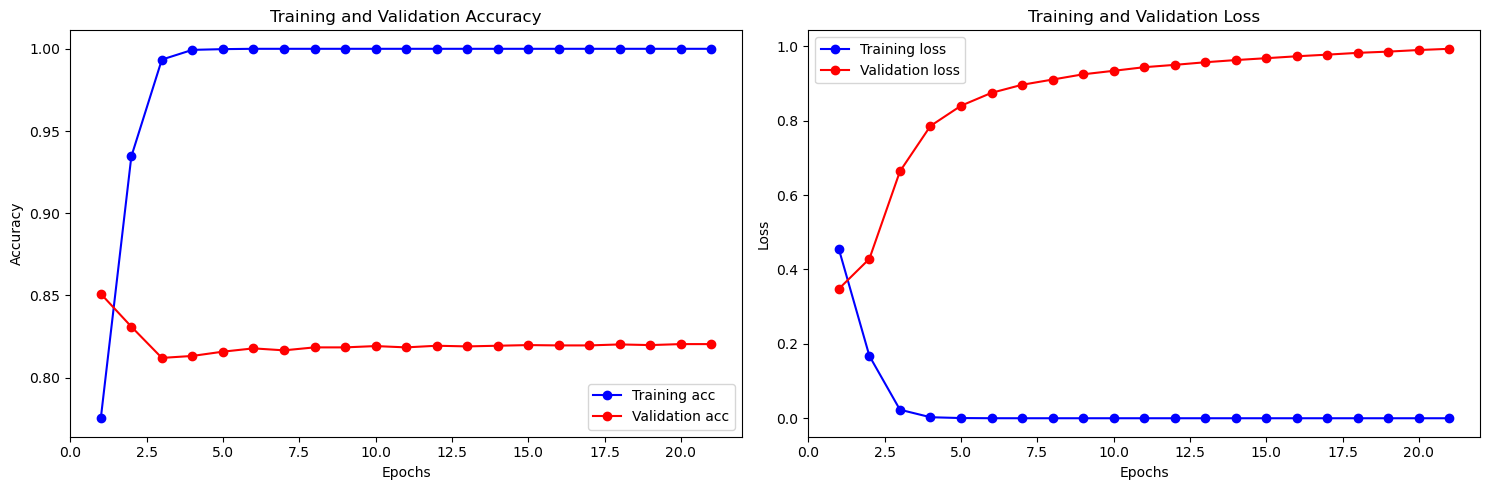

In [10]:
# Problem 2 - (f)

from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early_stop = EarlyStopping(monitor='val_acc', patience=20, restore_best_weights=True)

# Model 1 선택
model_cb = Sequential()
model_cb.add(Embedding(max_words, 100))
model_cb.add(Flatten())
model_cb.add(Dense(32, activation='relu'))
model_cb.add(Dense(1, activation='sigmoid'))

model_cb.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

hist_cb = model_cb.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=0
)

# 정확도 시각화
acc = hist_cb.history['acc']
val_acc = hist_cb.history['val_acc']
loss = hist_cb.history['loss']
val_loss = hist_cb.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()